# BooleaNet in the "Python 2 (Ubuntu Linux)" kernel

A [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
C [False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, True]
B [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
D [True, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True]
Cycle of length 4 starting at index 1
(1, 4)


/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f46bb75a850>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f46bd83be10>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


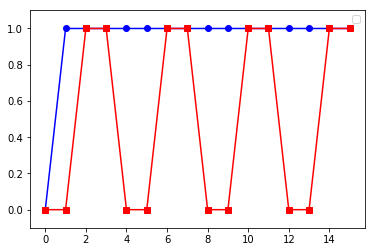

In [1]:
# %load https://raw.githubusercontent.com/ialbert/booleannet/master/examples/tutorials/t-02.py
import pylab
from boolean2 import Model

#
# This initial condition leads to a cycle of period 4.
# If A is set to False, a steady state is obtained.
#
# 
text = """
A = True
B = False
C = False
D = True

B* = A or C
C* = A and not D
D* = B and C
"""

model = Model( text=text, mode='sync')
model.initialize()
model.iterate( steps=15 )

# the model data attribute holds the states keyed by nodes
for node in model.data:
    print node, model.data[node]

# this is a helper function that reports the cycle lengths 
# and the  index at wich the cycle started
model.report_cycles()

#
# the same thing as above but
# will not print only return the two parameters
#
print model.detect_cycles()    

#
# this is how one plots the values, delete this below
# if matplotlib is not installed
#
p1 = pylab.plot( model.data["B"] , 'ob-' )
p2 = pylab.plot( model.data["C"] , 'sr-' )
pylab.legend( [p1,p2], ["B","C"])
pylab.ylim((-0.1,1.1))
pylab.show()    




In [2]:
# %load https://raw.githubusercontent.com/ialbert/booleannet/master/examples/tutorials/t-03.py
import boolean2
from boolean2 import Model

#
# Random sampling of initial conditions
#
# If A is set to False, a steady state is obtained.
#
# 
text = """
A = True
B = Random
C = Random
D = Random

B* = A or C
C* = A and not D
D* = B and C
"""

seen = {}

 
#
# the key will be the fingerprint of the first state 
#(some random inital conditions may be the same), it is fine to overwrite in this case
# as the 'sync' update rule is completely deterministic
#
for i in range(10):
    model = Model( text=text, mode='sync')
    model.initialize()
    model.iterate( steps=20 )

    # detect the cycles in the states
    size, index = model.detect_cycles() 
    
    # fingerprint of the first state
    key = model.first.fp()

    # keep only the first 10 states out of the 20
    values = [ x.fp() for x in model.states[:10] ]

    # store the fingerprinted values for each initial state
    seen [ key ] = (index, size, values )

# print out the observed states
for first, values in seen.items():
    print 'Start: %s -> %s' % (first, values)


Start: 0 -> (4, 1, [0, 1, 2, 3, 4, 1, 2, 3, 4, 1])
Start: 1 -> (4, 0, [1, 2, 3, 4, 1, 2, 3, 4, 1, 2])
Start: 3 -> (4, 0, [3, 4, 1, 2, 3, 4, 1, 2, 3, 4])
Start: 4 -> (4, 0, [4, 1, 2, 3, 4, 1, 2, 3, 4, 1])
Start: 5 -> (4, 1, [5, 2, 3, 4, 1, 2, 3, 4, 1, 2])


/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f46bb54d590>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f46bb5ead10>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f46bb54dd90>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


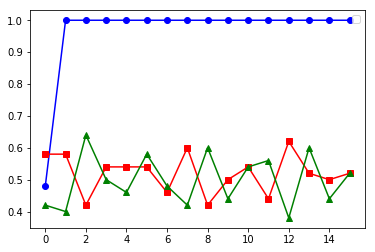

In [3]:
# %load https://raw.githubusercontent.com/ialbert/booleannet/master/examples/tutorials/t-05.py
#
#
# The collector helper function
#
# Asynchronous updating rules are non deterministic and
# need to be averaged over many runs
#
# The collector class makes this averaging very easy. It takes
# a list of states and nodes to build a data structure that 
# can compute the average the state of each node over all simulation and each timestep.
#
# The output of averaging (in the normalized mode) is a value between
# 0 and 1 representing the fraction of simulation (multiply by 100 to get percent) 
# that had the node in state True. 
#
#

import boolean2, pylab
from boolean2 import util

text = """
A = True
B = Random
C = Random
D = Random

B* = A or C
C* = A and not D
D* = B and C
"""

coll  = util.Collector()
for i in range(50):
    model = boolean2.Model( text, mode='async')
    model.initialize()
    model.iterate( steps=15 ) 

    #
    # in this case we take all nodes
    # one could just list a few nodes such as [ 'A', 'B', 'C' ]
    #
    nodes = model.nodes

    #
    # this collects states for each run
    #
    coll.collect( states=model.states, nodes=nodes )

#
# this step averages the values for each node
# returns a dictionary keyed by nodes and a list of values
# with the average state for in each timestep
#
avgs = coll.get_averages( normalize=True )

# make some shortcut to data to for easier plotting
valueB = avgs["B"]
valueC = avgs["C"]
valueD = avgs["D"]

#
# plot the state of the nodes
#
p1 = pylab.plot( valueB , 'ob-' )
p2 = pylab.plot( valueC , 'sr-' )
p3 = pylab.plot( valueD , '^g-' )
pylab.legend( [p1,p2,p3], ["B","C","D"])

pylab.show()  